<a href="https://colab.research.google.com/github/naoya1110/zakkuri_AI_nyumon/blob/main/Training_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv8の学習

## YOLOv8のセットアップ
物体検出モデルYOLOシリーズの最新版YOLOv8をインストールします。

In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.111 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


## パッケージのインポート
必要なパッケージをインポートします。

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import gdown

## データセットのダウンロード
サイコロのデータセットをダウンロードします。このデータセットはRoboflowでタグ付けしYOLOv8フォーマットで出力したものです。

In [3]:
gdown.download('https://drive.google.com/uc?id=1J7jlb3lfWZeKpP82pBGwEEC9tczfspBM', 'dice_dataset.zip', quiet = False)
! unzip -d datasets dice_dataset.zip > /dev/null 2>&1

Downloading...
From: https://drive.google.com/uc?id=1J7jlb3lfWZeKpP82pBGwEEC9tczfspBM
To: /content/dice_dataset.zip
100%|██████████| 18.6M/18.6M [00:00<00:00, 95.3MB/s]


## 学習済みモデルの読み込み
COCOデータセットで学習されたYOLOv8のモデルを読み込みます。YOLOv8にもいくつかの種類があります。詳しくは以下のリンクを参照してください。

https://github.com/ultralytics/ultralytics#models

In [4]:
# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

100%|██████████| 6.23M/6.23M [00:00<00:00, 234MB/s]


## 学習
モデルを学習させます。

In [5]:
results = model.train(data='datasets/dice_dataset/data.yaml', epochs=100)  # train the model

Ultralytics YOLOv8.0.111 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=datasets/dice_dataset/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, d

## 物体検出
学習済みモデルを使って物体検出（推論）します。

In [10]:
# Predict on an image
results = model("datasets/dice_dataset/valid/images/2023_01_19_0024_jpg.rf.f71d892de31c157f850505648e90ee9b.jpg", save=True)


image 1/1 /content/datasets/dice_dataset/valid/images/2023_01_19_0024_jpg.rf.f71d892de31c157f850505648e90ee9b.jpg: 384x640 12 1s, 10 2s, 11 3s, 7 4s, 6 5s, 11 6s, 10.7ms
Speed: 4.8ms preprocess, 10.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


物体検出の結果画像は`runs/detect/predict`に保存されています。これを表示してみましょう。

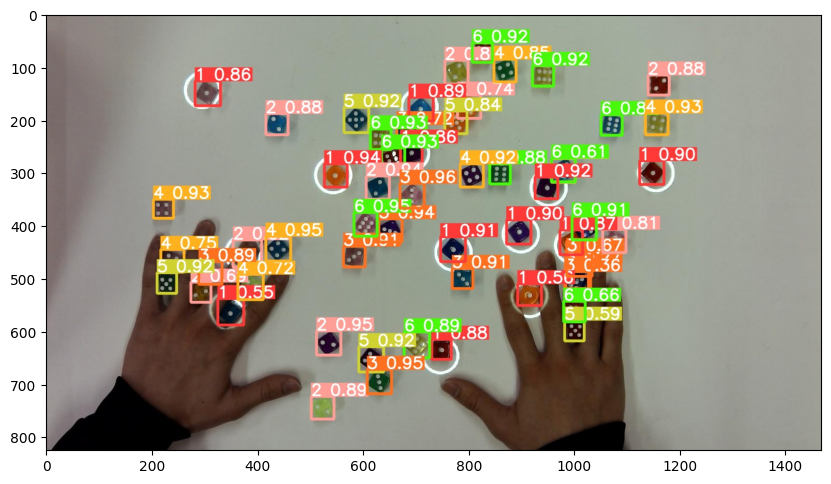

In [11]:
img = cv2.imread("/content/runs/detect/predict/2023_01_19_0024_jpg.rf.f71d892de31c157f850505648e90ee9b.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,6))
plt.imshow(img)

## 検出結果の処理
検出結果は`results`に保存されています。この中から必要な情報を抜き出します。

In [12]:
detections = results[0].boxes.data
detections = detections.to("cpu").numpy()
detections

array([[     670.76,      320.69,      716.43,      367.46,     0.96046,           2],
       [     416.56,       420.5,      463.62,      467.82,     0.95351,           3],
       [     512.01,      599.25,      558.44,      645.49,     0.95023,           1],
       [     608.17,       672.2,      654.66,      718.68,     0.94782,           2],
       [     583.57,      375.49,       627.3,       420.1,     0.94537,           5],
       [     606.88,      306.74,      650.76,      350.97,      0.9402,           1],
       [     527.13,      283.22,      570.64,      327.22,     0.93909,           0],
       [     630.43,      387.32,      674.34,      431.93,     0.93749,           2],
       [     635.07,      253.32,      679.14,      297.81,     0.93116,           5],
       [     203.41,       350.6,      241.76,      386.71,     0.92759,           3],
       [     614.12,      217.39,      653.01,      256.86,     0.92536,           5],
       [     1135.6,      187.29,      1178

`detections`は`n`行6列のNumpy配列です。ここで`n`は検出された物体の数です。各行には個々の物体に対するデータが以下のように入っています。

```
[left, top, right, bottom, confidence, class_id]

# left: 左端の座標
# top: 上端の座標
# right: 右端の座標
# bottom: 下端の座標
# conf: 予測されたクラスの信頼度
# class_id: 予測されたクラスのID
```


クラスIDとクラス名の関係は次のようになっています。

In [13]:
classnames = results[0].names
classnames

{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6'}

`detections`のデータを使って検出結果を描画してみましょう。

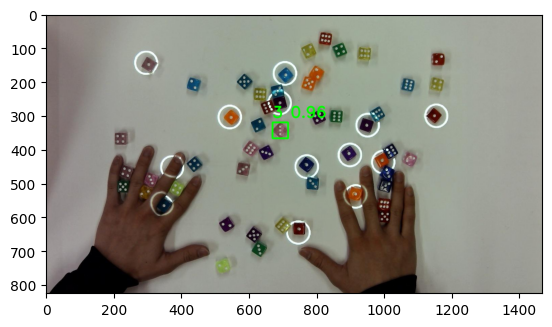

In [15]:
### 検出結果の整理
det = detections[0]    # 1つ目の検出結果を取得
left, top, right, bottom, conf, id = det    # 座標，信頼度, クラスIDを取得
classname = classnames[int(id)]    # クラスIDからクラス名に変換

### 元の画像を読み込み
img = cv2.imread("datasets/dice_dataset/valid/images/2023_01_19_0024_jpg.rf.f71d892de31c157f850505648e90ee9b.jpg")

### 枠(バウンディングボックス)を描画
img = cv2.rectangle(img,
                    pt1 = (int(left), int(top)),
                    pt2 = (int(right), int(bottom)),
                    color = (0,255,0),
                    thickness = 3,
                    lineType = cv2.LINE_AA)

### テキストを描画
cv2.putText(img,
            text = f"{classname} {conf:.2f}",
            org = (int(left), int(top)-15),
            fontFace = cv2.FONT_HERSHEY_SIMPLEX,
            fontScale = 1.5,
            color = (0, 255, 0),
            thickness = 3,
            lineType = cv2.LINE_AA)


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)